# Tic Tac Toe 

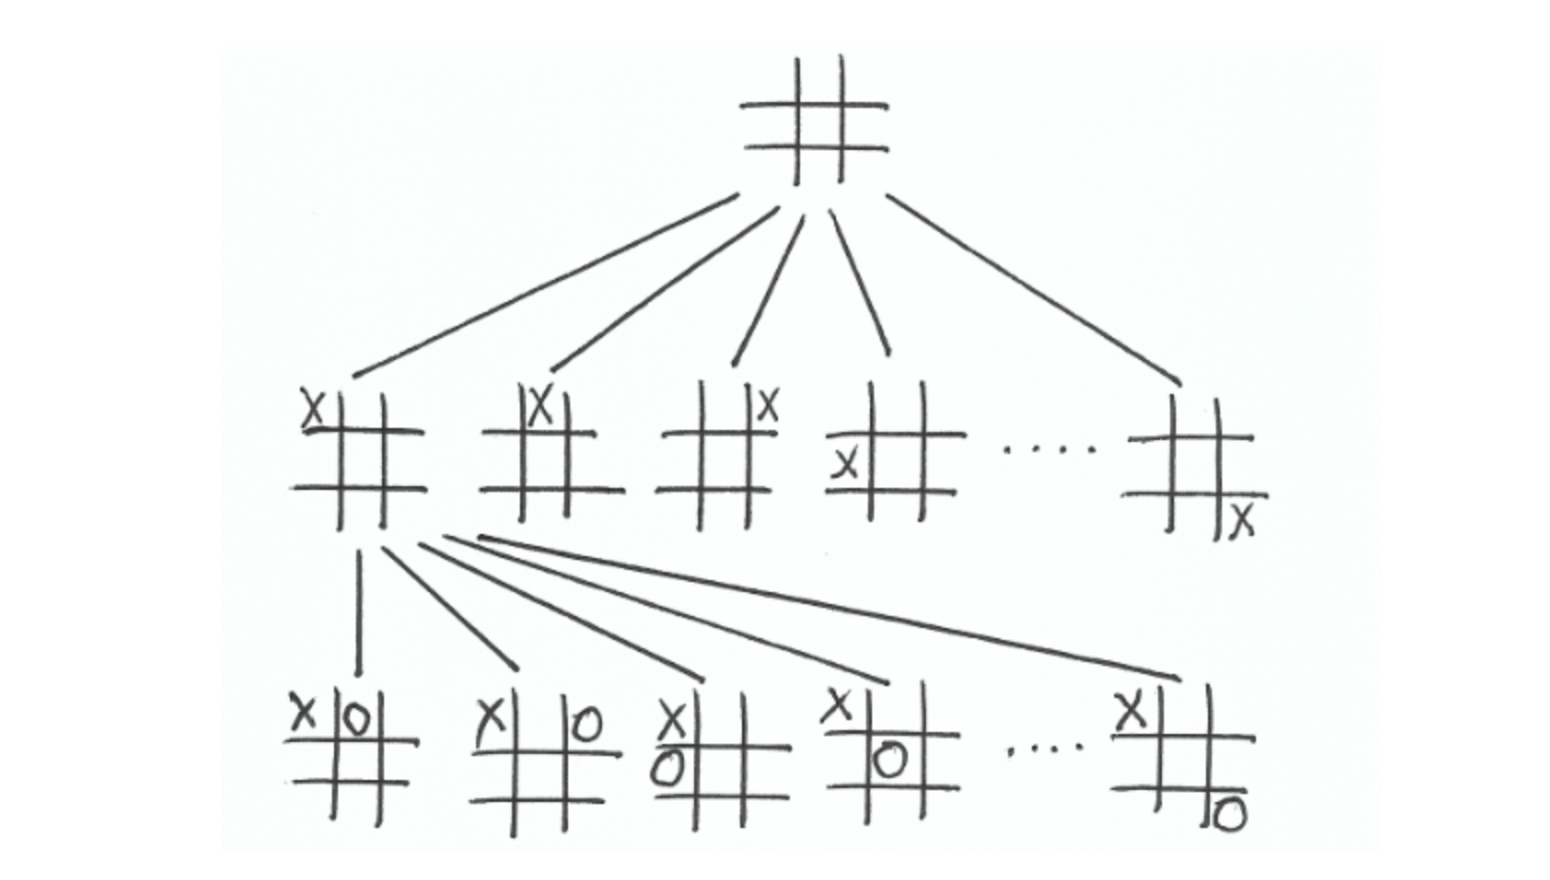

Tic Tac Toe adalah permainan yang hanya dimainkan dengan kertas dan pensil dengan menuliskan simbol X dan O pada sebuah matrix 3x3. Pemain pertama dapat menempatkan 3 simbol X/O pada 1 garis secara berurut , baik itu horizontal, vertikal, dan diagonal akan memenangkan permainan.

Pada praktikum kali ini Anda akan mencoba membuat sebuah permainan Tic Tac Toe dengan mengimplementasi Algoritma Minimax. 

Bermain game adalah salah satu cara untuk mempelajari strategi pembelajaran mesin. Sebagian besar bot bermain game melibatkan beberapa mekanisme pencarian. Begitulah cara bot dapat "melihat" langkah mana yang dapat menghasilkan hasil yang menguntungkan di masa mendatang.

Algoritma minimax



#### Bagaimana cara manusia memainkan permainan?
Bayangkan Anda ingin bermain tic tac toe. Bagaimana Anda akan melakukan itu?

Anda akan mempelajari aturannya terlebih dahulu. Kemudian mulailah bermain game. Pilihan langkah Anda tentu akan dipengaruhi oleh situasi permainan. 
Jika saya bermain di sana, dan dia bermain di sana, maka saya bisa bermain di sana, dan seterusnya. Seiring waktu, Anda mulai memahami strategi mana yang lebih baik atau lebih buruk.

Anda mulai mengumpulkan intuisi tentang permainan.

#### Bagaimana Bot/Komputer bermain?

Komputer tidak memiliki intuisi. Cara paling mudah untuk mengajarkan sebuah program untuk bermain adalah dengan pedekatan brute-force yang salah satunya menggunakan algoritma minimax searching. 

###### Minimax Searching 
memanfaatkan penelusuran nilai minimum untuk mensimulasikan setiap kemungkinan langkah dan langkah balasan. Dengan begitu strategi ini, bot akan selalu memilih langkah terbaik dalam setiap situasi yang terjadi.

Meskipun demikian solusi dengan pendekatan brute-force umumnya memiliki kompleksitas yang cukup tinggi untuk permainan yang lebih kompleks. 

In [ ]:
from ipywidgets import widgets, HBox, VBox, Layout
from IPython.display import display
from functools import partial
import numpy as np
#import tictactoe
import tictactoe_minimax_helper as minimax_helper

Referensi algoritma minimax : http://neverstopbuilding.com/minimax

Selanjutnya Anda akan mendefinisikan fungsi-fungsi yang dibutuhkan untuk membentuk tampilan dari permainan tic tac toe.

In [ ]:
class General_functions(object):
    def __init__(self, matrix, actual_turn):
        self.N = 3
        self.button_list = None
        self.text_box = None
        self.matrix = matrix
        self.game_finished = False
        self.actual_turn = actual_turn
        
    def display_matrix(self):
        N = self.N
        childs = []
        for i in range(N):
            for j in range(N):
                if self.matrix[i,j]==1:
                    self.button_list[i*N + j].description = 'o'
                if self.matrix[i,j]==-1:
                    self.button_list[i*N + j].description = 'x'

    def on_button_clicked(self, index, button):
        N = self.N  

        if self.game_finished:
            return

        y = index%N
        x = int(index/N)
        if self.matrix[x,y]!=0:
            self.text_box.value = 'Anda tidak bisa membuat input disana!'
            return
        button.description = self.actual_turn[0]

        if self.actual_turn == 'o':
            self.matrix[x,y] = 1
            self.game_finished, status = minimax_helper.game_over(self.matrix)
            if self.game_finished:
                if (status!=0):
                    self.text_box.value = 'o wins'
                else: 
                    self.text_box.value = 'draw'
            else:
                self.actual_turn = 'x'
                self.text_box.value = 'Juega '+self.actual_turn
        else:
            self.matrix[x,y] = -1
            self.game_finished, status = minimax_helper.game_over(self.matrix)
            if self.game_finished:
                if (status!=0):
                    self.text_box.value = 'x wins'
                else: 
                    self.text_box.value = 'draw'
            else:
                self.actual_turn = 'o'
                self.text_box.value = 'Juega '+self.actual_turn
        self.computer_play()
        
    def draw_board(self):
        self.text_box = widgets.Text(value = 'Juega '+self.actual_turn, layout=Layout(width='129px', height='40px'))
        self.button_list = []
        for i in range(9):
            button = widgets.Button(description='',
            disabled=False,
            button_style='', # 'success', 'info', 'warning', 'danger' or ''
            tooltip='Click me',
            icon='',
            layout=Layout(width='40px', height='40px'))
            self.button_list.append(button)
            button.on_click(partial(self.on_button_clicked, i))
        tic_tac_toe_board = VBox([HBox([self.button_list[0],self.button_list[1],self.button_list[2]]),
                HBox([self.button_list[3],self.button_list[4],self.button_list[5]]),
                HBox([self.button_list[6],self.button_list[7],self.button_list[8]])])
        display(VBox([self.text_box, tic_tac_toe_board]))
        return

    def computer_play(self):

        if self.game_finished:
            return
        
        if self.actual_turn=='x':
            turn = -1
            next_turn = 'o'
        if self.actual_turn=='o':
            turn = 1
            next_turn = 'x'
        self.matrix = self.get_best_play(turn)
        self.display_matrix()
        self.actual_turn = next_turn
        self.text_box.value = 'Juega '+self.actual_turn
        self.game_finished, status = minimax_helper.game_over(self.matrix)
        if self.game_finished:
            if (status!=0):
                self.text_box.value = 'computer wins'
            else: 
                self.text_box.value = 'draw'

    def get_best_play(self, turn):
        # 1000 is an infinite value compared with the highest cost of 10 that we can get

        choice, points, nodes_visited = minimax_helper.minimax(self.matrix, turn)
        print('points:',points)
        print('nodes_visited:',nodes_visited)
        return choice

In [ ]:
def start_game(computer_starts = True, user_icon='x', start_mode = 'center'):
    matrix = np.zeros((3,3))
    
    if user_icon=='x':
        computer_icon_representation = 1
    else:
        computer_icon_representation = -1

    GF = General_functions(matrix, user_icon)
    GF.draw_board()

    if computer_starts:
        if start_mode == 'center':
            matrix[1,1] = computer_icon_representation
        elif start_mode == 'minimax':
            GF.computer_play()
        elif start_mode == 'random':
            x = np.random.randint(3)
            y = np.random.randint(3)
            matrix[x,y] = computer_icon_representation

    GF.display_matrix()

In [ ]:
# start_mode:
# 'minimax': Uses minimax to select the first move
# 'center': Starts on the center
# 'random': Starts on a random position
# user_icon:
#  'x': user is x
#  'o': user is o
# computer_starts: True or False

start_game(computer_starts = True, user_icon = 'x', start_mode = 'random')
print (" Silahkan klik salah kotak untuk menjalankan langkah Anda")